# Credit Card Fraud Detection

## Objective
Identify **fraudulent credit card transactions** using machine learning.

## Dataset Overview
The dataset contains anonymized credit card transactions labeled as fraud or not.

- `Time`, `Amount`, and anonymized features `V1` to `V28`
- `Class`: 1 for fraud, 0 for non-fraud

## Workflow
1. Load and explore the dataset
2. Handle class imbalance
3. Feature scaling and model training
4. Evaluate performance

In [10]:
# Import necessary libraries
import kagglehub as kh
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE


In [2]:
# Load the dataset
path = kh.dataset_download("mlg-ulb/creditcardfraud")
csv_path = os.path.join(path, "creditcard.csv")
df = pd.read_csv(csv_path)
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Exploratory Data Analysis

Class
0    284315
1       492
Name: count, dtype: int64


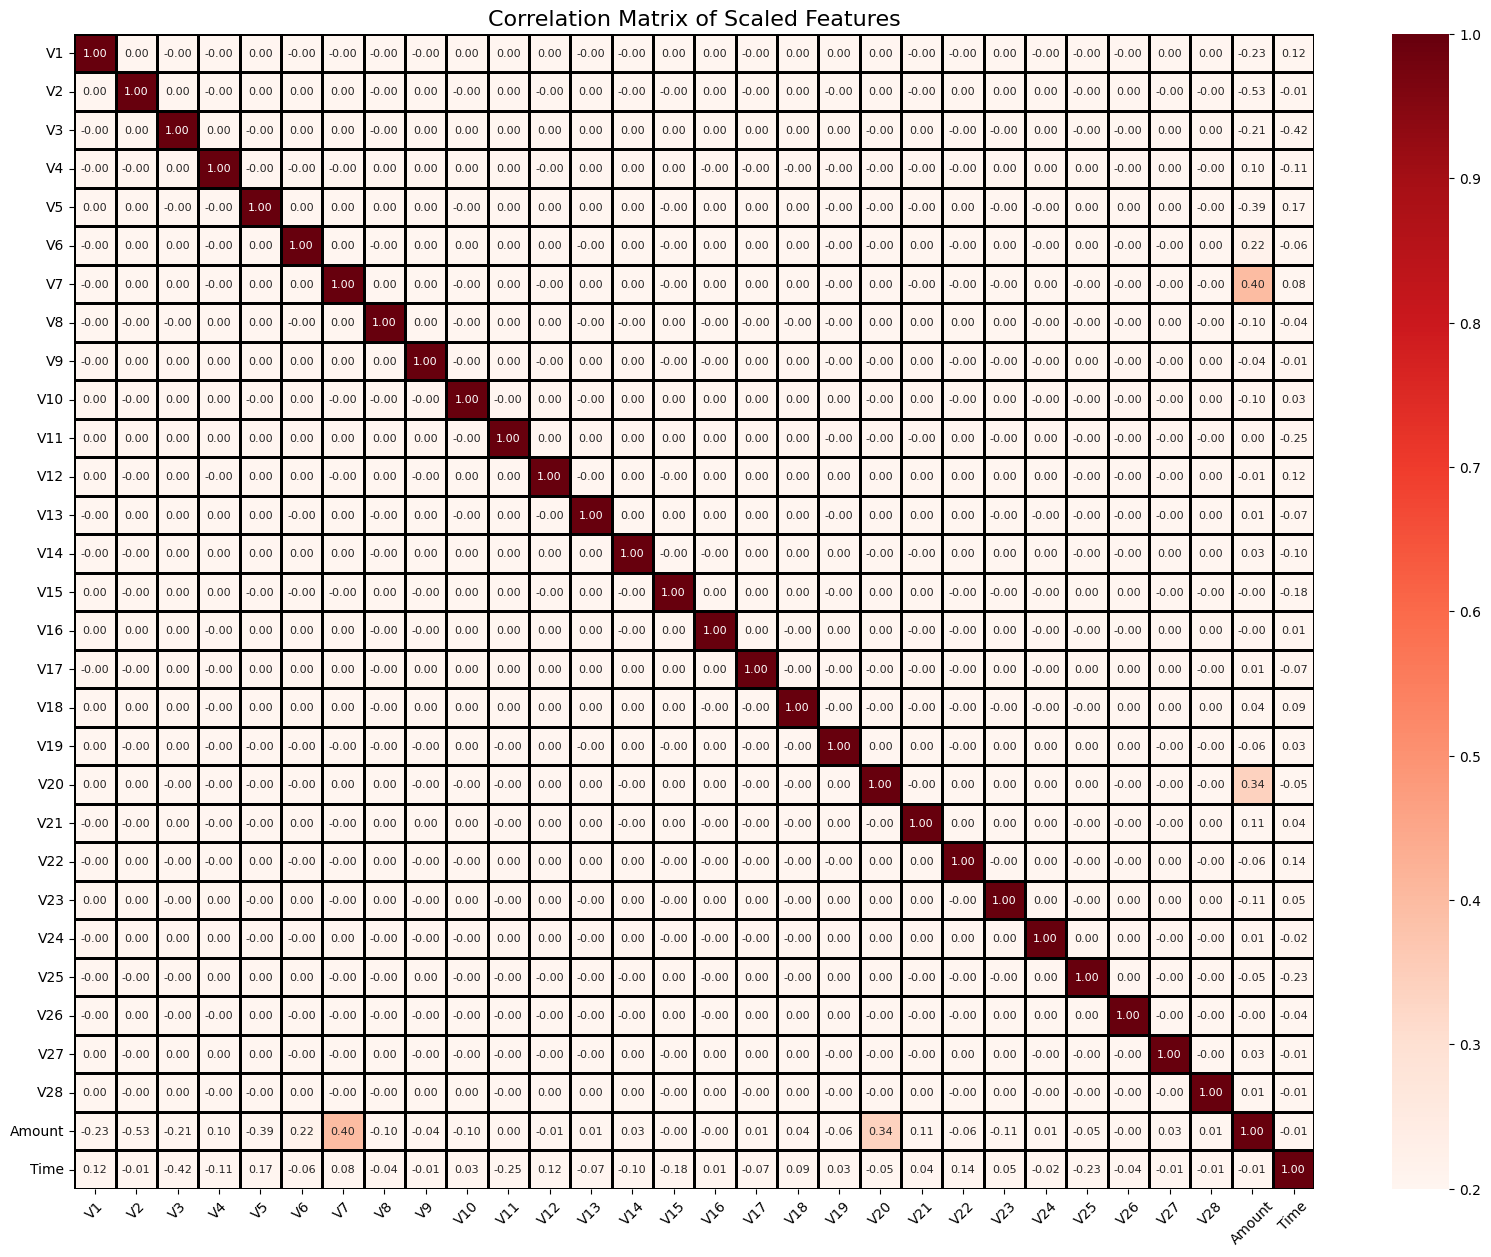

In [3]:
print(df['Class'].value_counts())
cols_to_scale = [f'V{i}' for i in range(1,29)] + ['Amount', 'Time']
plt.figure(figsize=(20, 15)) 
sns.heatmap(
    df[cols_to_scale].corr(), 
    annot=True, 
    cmap='Reds', 
    vmin=0.2, 
    linewidths=1,        
    linecolor='black',
    fmt=".2f",          
    annot_kws={"size": 8}
)

# 3. Rotate labels to prevent overlap
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title("Correlation Matrix of Scaled Features", fontsize=16)
plt.show()

## Data Preprocessing

In [4]:
df_scaled = df.copy()
df_scaled[cols_to_scale] = StandardScaler().fit_transform(df_scaled[cols_to_scale])
print(df_scaled.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068   
1 -1.996583  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820   
2 -1.996562 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454   
3 -1.996562 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150   
4 -1.996541 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.193679  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507   
1 -0.063700  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131   
2  0.639776  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092   
3  0.192071  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027   
4  0.479302 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250   

        V25       V26       V27       V28    Amount  Class  
0  0.24

## Model-1: Logistic Regressikon

In [5]:
features = df_scaled[cols_to_scale]
target = df_scaled['Class']
X_train, X_test, y_train,  y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55525  1339]
 [    8    90]]


## Insights and Conclusion
- Performance: The baseline model achieved a high accuracy but a poor Recall of 0.58. This means the model failed to detect 42% of the fraudulent transactions (41 out of 98).

- The Problem: The massive class imbalance (only 492 fraud cases vs. 284,315 normal) causes the model to be biased toward the majority class. It treats fraud as "noise" rather than a pattern to be learned.

- Conclusion: Accuracy is a misleading metric here. We need a strategy to make the model more sensitive to the minority class.

## Model-2: Logistic Regression using SMOTE

In [6]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print(f'Resampled dataset shape: {y_train_res.value_counts()}')
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_res, y_train_res)
y_pred_smote = model_smote.predict(X_test)
print("Classification Report (After SMOTE)")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_smote))

Resampled dataset shape: Class
0    227451
1    227451
Name: count, dtype: int64
Classification Report (After SMOTE)
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion Matrix
[[55426  1438]
 [    8    90]]


## Insights and Conclusion:
- The Shift: By using SMOTE to balance the training data, the Recall jumped to 0.92. We are now catching 90 out of 98 fraud cases.

- The Trade-off: There is a significant drop in Precision (0.06). The model is now over-sensitive, flagging 1,438 legitimate transactions as fraud (False Positives).

- Conclusion: While this model is safer for the bank's bottom line (less stolen money), it creates a poor customer experience due to the high number of false alarms.

## Model-3: Random Forest Classifier

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix
[[56855     9]
 [   16    82]]


## The most important features to train the model

Text(0.5, 1.0, 'Top 10 Features for Detecting Fraud')

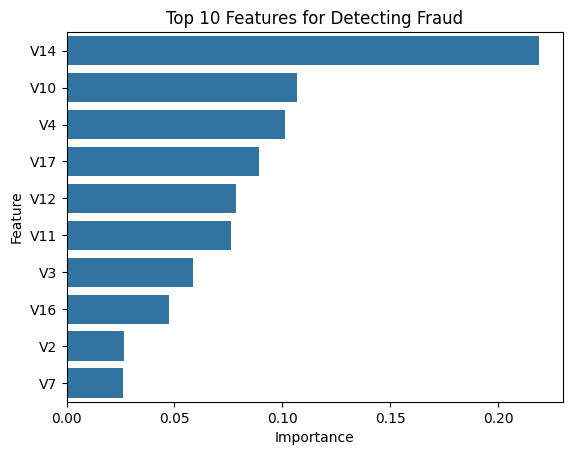

In [8]:
importances = rf_model.feature_importances_
feature_df = pd.DataFrame({'Feature': cols_to_scale, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_df.head(10))
plt.title('Top 10 Features for Detecting Fraud')

## Insights:
- The Breakthrough: The Random Forest model provides the best balance. It achieved a Precision of 0.90 and a Recall of 0.84.

- Efficiency: Unlike Logistic Regression, the Random Forest caught 82 fraud cases while only triggering 9 false alarms (compared to 1,438 previously).

- Why it worked: Tree-based ensembles are better at capturing non-linear relationships and are more robust against the "synthetic noise" that SMOTE can sometimes introduce.

## Final Conclusion:
- Scaling: Using StandardScaler was essential to ensure that the Amount and Time features did not numerically overwhelm the PCA components.

- Class Imbalance: SMOTE was the turning point of the project. Without oversampling the minority class, the models were unable to effectively identify fraudulent patterns.

- Model Selection: While Logistic Regression is a good starting point, Random Forest is the superior choice for this dataset. It offers the high precision necessary to maintain customer trust while maintaining the high recall needed to secure the bank's assets.

- Business Value: This system would allow the bank to automate fraud detection with 84% accuracy in catching thieves while maintaining an extremely low "insult rate" for legitimate customers.